In [1]:
from src.data import load_large_jsonl, cross_validation

items_df = load_large_jsonl('../data/processed/cleaned_items_df.jsonl')
reviews_df = load_large_jsonl('../data/processed/cleaned_reviews_df.jsonl')

In [2]:
items_df.head()

,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN,NaN


In [3]:
reviews_df.head()

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [4]:
merged_df = reviews_df.merge(items_df, on='parent_asin', how='inner')
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head())

Merged DataFrame shape: (13191284, 19)
   rating        asin parent_asin                       user_id  \
0       5  B00YQ6X8EO  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ   
1       4  B081TJ8YS3  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ   
2       5  B07PNNCSP9  B097R46CSY  AE74DYR3QUGVPZJ3P7RFWBGIX7XQ   
3       1  B09JS339BZ  B09JS339BZ  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ   
4       5  B08BZ63GMJ  B08BZ63GMJ  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ   

                timestamp  helpful_vote  verified_purchase main_category  \
0 2020-05-05 14:08:48.923             0               True    All Beauty   
1 2020-05-04 18:10:55.070             1               True    All Beauty   
2 2020-05-16 21:41:06.052             2               True    All Beauty   
3 2022-01-28 18:13:50.220             0               True    All Beauty   
4 2020-12-30 10:02:43.534             0               True    All Beauty   

                                               title  average_rating  \
0  Herbivore - Natural Sea Mi

In [5]:
merged_df['high_rating'] = (merged_df['rating'] >= 4).astype(int)

In [6]:
X = merged_df[['average_rating', 'rating_number', 'helpful_vote']].fillna(0)
y = merged_df['high_rating']

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Taille du jeu d'entraînement: {X_train.shape}")
print(f"Taille du jeu de test: {X_test.shape}")


Taille du jeu d'entraînement: (9233898, 3)
Taille du jeu de test: (3957386, 3)


In [8]:
# Entraînement du modèle de régression logistique
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

In [9]:
# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8161

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.11      0.19    746428
           1       0.83      0.98      0.90   3210958

    accuracy                           0.82   3957386
   macro avg       0.69      0.55      0.54   3957386
weighted avg       0.78      0.82      0.76   3957386


Confusion Matrix:
[[  84402  662026]
 [  65844 3145114]]


In [10]:
# Coefficients du modèle
print("Coefficients du modèle:")
for feature, coef in zip(X.columns, logreg.coef_[0]):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

Coefficients du modèle:
  average_rating: 1.5855
  rating_number: -0.0000
  helpful_vote: -0.0059
Intercept: -5.4364


In [16]:
# Cross-validation de la régression logistique
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

# Définir le modèle
logreg_cv = LogisticRegression(max_iter=1000, random_state=42)

# Définir les métriques à évaluer
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Effectuer la cross-validation
print("Cross-validation en cours (5 folds)...")
cv_results = cross_validate(logreg_cv, X, y, cv=5, scoring=scoring, n_jobs=-1)

# Afficher les résultats
print("\n=== Résultats de la Cross-Validation (5 folds) ===\n")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    # Enlever les scores NaN
    scores = scores[~np.isnan(scores)]
    print(f"{metric.upper()}:")
    print(f"  Scores par fold: {scores}")
    print(f"  Moyenne: {scores.mean():.4f}")
    print(f"  Écart-type: {scores.std():.4f}")
    print()


Cross-validation en cours (5 folds)...

=== Résultats de la Cross-Validation (5 folds) ===

ACCURACY:
  Scores par fold: [0.81313913 0.82492797 0.79945699 0.8109016 ]
  Moyenne: 0.8121
  Écart-type: 0.0090

PRECISION:
  Scores par fold: [0.8383674  0.82600926 0.82284306 0.82387055]
  Moyenne: 0.8278
  Écart-type: 0.0062

RECALL:
  Scores par fold: [0.95353824 0.99350195 0.95939487 0.97548585]
  Moyenne: 0.9705
  Écart-type: 0.0155

F1:
  Scores par fold: [0.89225164 0.90204645 0.88588779 0.89329058]
  Moyenne: 0.8934
  Écart-type: 0.0058

ROC_AUC:
  Scores par fold: [0.71435815 0.77836997 0.66714496 0.68918526]
  Moyenne: 0.7123
  Écart-type: 0.0417



C:\Users\jackl\PycharmProjects\bloc-5\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jackl\PycharmProjects\bloc-5\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jackl\PycharmProjects\bloc-5\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\jackl\PycharmProjects\bloc-5\.venv\Lib\site-pack

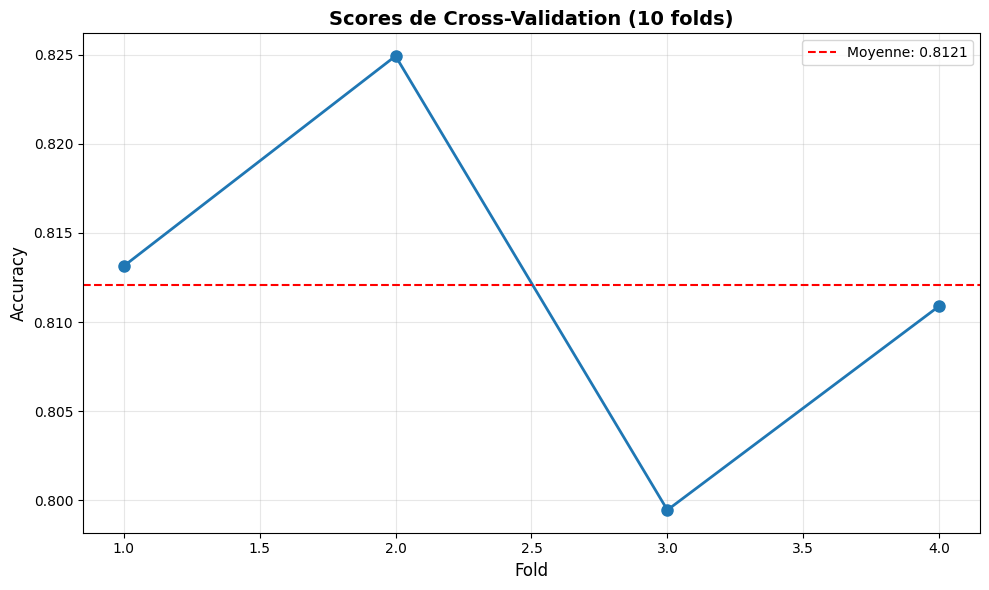

Accuracy moyenne: 0.8121
Écart-type: 0.0090


In [19]:
import matplotlib.pyplot as plt

# Effectuer une cross-validation avec 5 folds pour la visualisation
scores = cv_results[f'test_accuracy']
cv_scores = scores[~np.isnan(scores)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Moyenne: {cv_scores.mean():.4f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Scores de Cross-Validation (10 folds)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Accuracy moyenne: {cv_scores.mean():.4f}")
print(f"Écart-type: {cv_scores.std():.4f}")